## Importing Important Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Analyzing the data

In [42]:
# loading data from a csv file
df = pd.read_csv("/content/drive/MyDrive/datasets/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Categorical features:
- Sex
- Smoker
- Region

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.duplicated().sum()

1

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [48]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


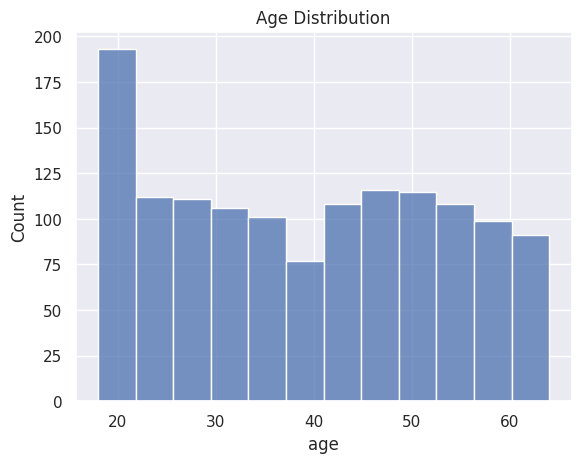

In [49]:
# distributing the age value
sns.set()
plt.figure()
sns.histplot(df["age"])
plt.title("Age Distribution")
plt.show()

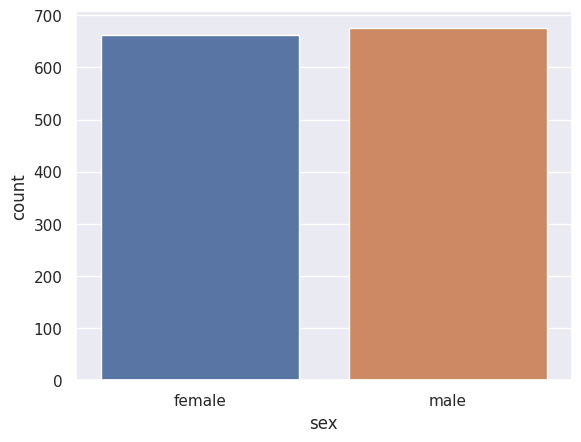

In [50]:
plt.figure()
sns.countplot(data=df, x="sex")
plt.show()

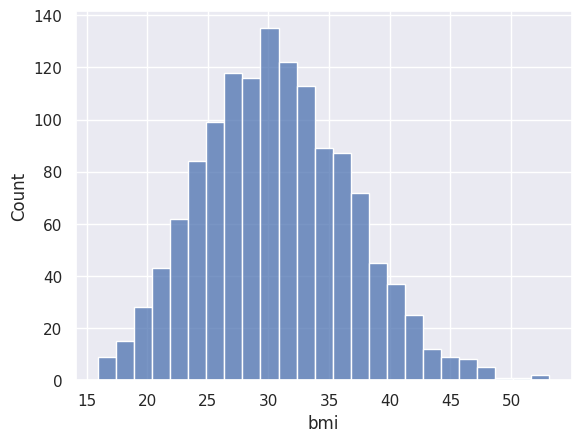

In [51]:
plt.figure()
sns.histplot(df["bmi"])
plt.show()

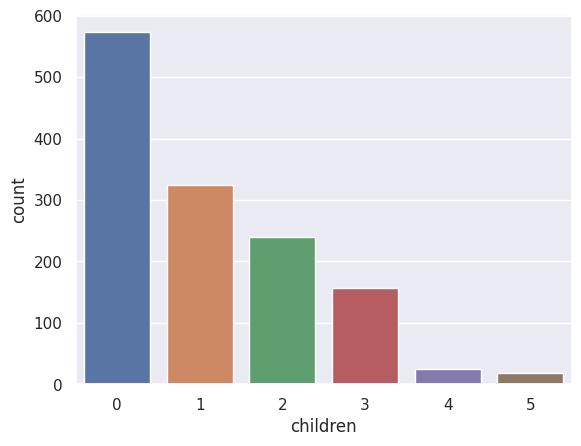

In [52]:
plt.figure()
sns.countplot(data=df, x="children")
plt.show()

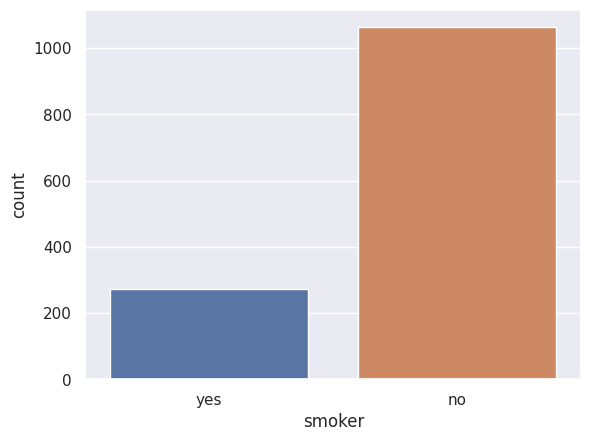

In [53]:
plt.figure()
sns.countplot(data=df, x="smoker")
plt.show()

<Axes: xlabel='region', ylabel='count'>

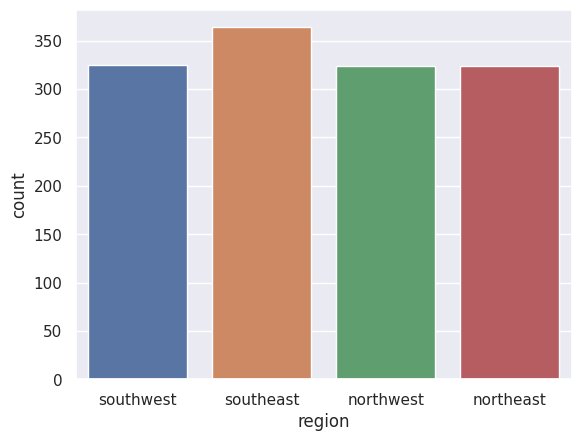

In [54]:
plt.figure()
sns.countplot(data=df, x="region")

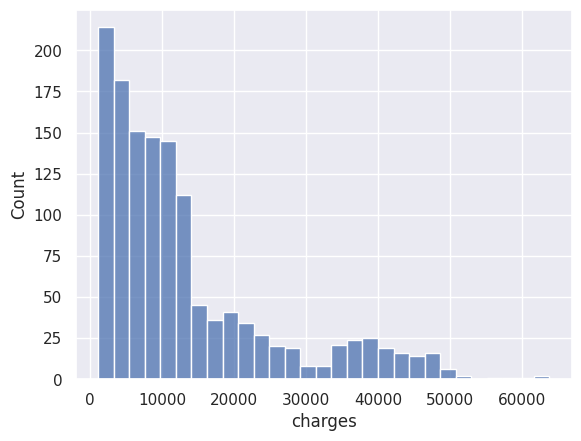

In [55]:
plt.figure()
sns.histplot(df["charges"])
plt.show()

## Outlier removal

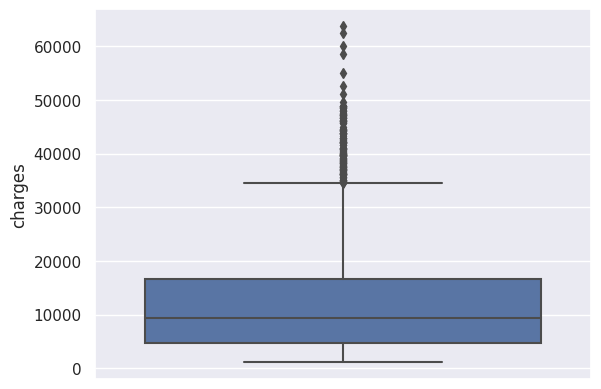

In [56]:
plt.figure()
sns.boxplot(data=df, y="charges")
plt.show()

In [57]:
q1 = df["charges"].quantile(0.25)
q3 = df["charges"].quantile(0.75)
iqr = q3-q1
upperExtreme = q3 + 1.5*iqr
lowerExtreme = q1 - 1.5*iqr
df= df[(df["charges"] >= lowerExtreme) & (df["charges"] <= upperExtreme)]

## Data preprocessing

Encoding the categorical features

In [58]:
# encoding sex column
df=df.replace({
    "sex":{
        "male":0,
        "female": 1
    },
    "smoker":{
        "yes":1,
        "no":0
    },
    "region":{
        "southeast":0,
        "southwest":1,
        "northeast":2,
        "northwest":3
    }
})

In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


## Splitting the Features and Label

In [60]:
x = df.drop(columns=["charges"], axis = 1);
y = df["charges"]

## Splitting the data into training and testing data

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, y_test.shape

((958, 6), (240,))

Scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the model

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [64]:
model.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(x_test)
y_pred

array([ 4453.25026672, 14487.84411325, 15278.32808806,  3650.05001455,
       28429.38935974,  5062.10703544, 13306.31332422,  8599.71391446,
       10164.5805117 , 10209.98619977, 10028.57740622,  3876.43419261,
       11556.00898004, 13902.65977575,  6715.96630237,  3563.22613543,
        8769.24900438, 13485.86661159, 24000.72381979,  3866.44371089,
        7467.94409559,  2227.17575175,  3790.27351577, 12646.07059284,
       12897.75092147,  4630.21057605,  4408.71800967,  2871.14768215,
       13153.3968051 ,  9455.96033103,  6965.92101218,  7522.7817783 ,
       26543.28188627,  9486.68875225,  5545.53832638, 10328.53284654,
        8429.58966647,  4259.66227095, 24107.29183225,  4143.2042319 ,
       22473.46616103,  3880.80544678, 22303.77946961,  7754.58535637,
       12423.24935278,  7971.49549393, 18987.00602704,  9069.15757103,
        6773.07847692, 10138.0379014 ,  9113.74952812, 13672.32440197,
       18896.80262454,  3522.53904559,  9004.75376277,  2949.00333791,
      

## Evaluating the model

In [66]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6012399658278959

In [72]:
input = {
    "age": [19],
    "sex": [1],
    "bmi": [27.9],
    "children": [0],
    "smoker": [1],
    "region": [1]
}

input_pd = pd.DataFrame(input)
int(model.predict(input_pd.values.tolist())[0])

88061

In [68]:
import pickle

pickle.dump(sc, open("scaler.pkl", "wb"))
pickle.dump({
    "sex":{
        "male":0,
        "female": 1
    },
    "smoker":{
        "yes":1,
        "no":0
    },
    "region":{
        "southeast":0,
        "southwest":1,
        "northeast":2,
        "northwest":3
    }
}, open("replace.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))